# **Analog-to-Digital Converter (ADC)**
An analog signal can be converted to a digital signal using an Analog-to-Digital Converter (ADC). The process involves three main steps: sampling, quantization, and encoding.

**Sampling:** The continuous analog signal is sampled at regular intervals with a certain sampling rate. The sampling rate should be at least twice the highest frequency present in the analog signal, as per the Nyquist-Shannon sampling theorem.

**Quantization:** The sampled signal is then quantized, which means the amplitude of each sample is rounded off to the nearest value that can be represented by a fixed number of bits. This step introduces quantization noise, which is the difference between the original analog signal and the quantized digital signal.

**Encoding:** Finally, the quantized values are encoded into binary code and stored in a digital format. The number of bits used for encoding affects the resolution and dynamic range of the digital signal.

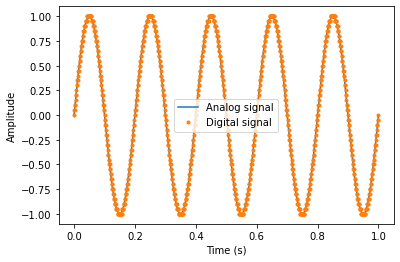

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the analog signal
f = 5  # Signal frequency
t = np.linspace(0, 1, 1000)  # Time axis
x = np.sin(2 * np.pi * f * t)  # Signal amplitude

# Define the analog-to-digital conversion parameters
fs = 20  # Sampling frequency
Ts = 1 / fs  # Sampling interval
nbits = 8  # Number of bits per sample

# Perform the analog-to-digital conversion
xq = np.round(x * 2**(nbits-1)) / 2**(nbits-1)  # Quantize the signal
xn = np.round(xq / Ts) * Ts  # Sample the quantized signal

# Plot the results
plt.figure()
plt.plot(t, x, label='Analog signal')
plt.plot(t, xn, '.', label='Digital signal')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


```
# Perform the analog-to-digital conversion
xq = np.round(x * 2**(nbits-1)) / 2**(nbits-1)  # Quantize the signal
xn = np.round(xq / Ts) * Ts  # Sample the quantized signal
```
In this code, we first quantize the analog signal "x" using the specified number of bits (nbits) and scale it to the range of -1 to 1 by multiplying it with 2**(nbits-1). The quantization process maps the continuous values of the analog signal to a finite set of discrete values.

Next, we sample the quantized signal (xq) at the specified sampling interval (Ts) by rounding the signal to the nearest multiple of the sampling interval using the np.round() function. This results in a digital signal "xn" that consists of a sequence of discrete samples.

The purpose of sampling the signal is to convert it from a continuous-time signal to a discrete-time signal, which can be stored and processed by a digital system. The sampling rate (1/Ts) determines the rate at which the signal is sampled, and the number of bits per sample determines the resolution of the digitized signal.


# **Digital to Analog Converter (DAC)**
To convert the digital signal back to an analog signal, we can use a digital-to-analog converter (DAC) which takes a sequence of discrete samples and produces a continuous-time analog signal.

Here's an example Python code to perform the digital-to-analog conversion of the digital signal "xn":

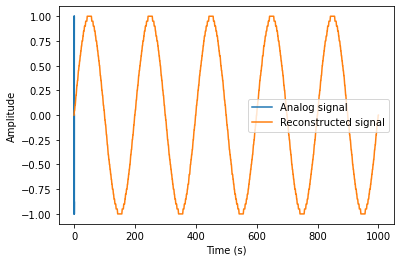

In [6]:
# Perform the digital-to-analog conversion
xa = np.interp(np.arange(0, len(xn), 1/fs), np.arange(0, len(xn), 1), xn) 

# Plot the results
plt.figure()
plt.plot(t, x, label='Analog signal')
plt.plot(np.arange(0, len(xn), 1/fs), xa, label='Reconstructed signal')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In this code, we first use the **"interp"** function from the "numpy" library to interpolate the digital signal "xn" to a continuous-time signal using linear interpolation. We use the sampling frequency "fs" to specify the time values at which the samples should be interpolated. The resulting analog signal "xa" is then plotted along with the original analog signal to visualize the quality of the reconstructed signal.

Note that the quality of the reconstructed analog signal depends on the sampling rate, the number of bits per sample, and the reconstruction filter used in the DAC. A higher sampling rate and more bits per sample generally result in a better reconstructed signal.


```
# Perform the digital-to-analog conversion
xa = np.interp(np.arange(0, len(xn), 1/fs), np.arange(0, len(xn), 1), xn)
```
In this code, we use the "**interp**" function from the "numpy" library to perform the digital-to-analog conversion of the digital signal "xn".

The "**interp**" function takes three arguments: the first argument is an array specifying the time values at which to interpolate the signal, the second argument is an array specifying the time values at which the original signal is sampled, and the third argument is the array of digital samples to be converted to analog form.

In this case, we specify the time values for interpolation using the "**np.arange**" function with a step size of 1/fs (i.e., the sampling interval), and the time values for the original signal using "np.arange" with a step size of 1 (i.e., one sample per unit time). This results in an interpolated signal with the same duration as the original signal, but at a higher sampling rate determined by the specified sampling frequency "fs".

The resulting analog signal "xa" is a continuous-time signal that represents an approximation of the original analog signal "x". Note that the quality of the reconstructed signal depends on the interpolation method used and the sampling rate used for the digital-to-analog conversion.


```
plt.plot(np.arange(0, len(xn), 1/fs), xa, label='Reconstructed signal')
```
In this code, we use the "plot" function from the "matplotlib" library to plot the reconstructed analog signal "xa".

The "plot" function takes two arguments: the first argument is an array specifying the x-axis values (i.e., time values), and the second argument is an array specifying the y-axis values (i.e., the amplitude values of the signal).

In this case, we use "np.arange" to create an array of time values for the x-axis, with a step size of 1/fs (i.e., the sampling interval). We use "xa" as the y-axis values, which represent the reconstructed analog signal.

The "label" argument is used to specify the label for the plot, which is "Reconstructed signal" in this case. This label will be used to create a legend for the plot.

Note that we can also plot the original analog signal "x" alongside the reconstructed signal to visualize the accuracy of the reconstruction. This can be done by adding another "plot" function call before the call to plot the reconstructed signal:

`plt.plot(t, x, label='Analog signal')`

Here, "t" is the array of time values for the original analog signal "x". This will plot the original analog signal alongside the reconstructed signal on the same plot, with the labels "Analog signal" and "Reconstructed signal" respectively.